## test the calibration method of matching star types
Have tested on both the calspec and pickles data. Looks like this wont work so wel,
the main problems likely stemming from both inacurate spec matching from colours and errors seem to be colour dependant, so hard to say what error should be associated with the desired passand (i.e. kepler)

In [ ]:
from tools import *
%matplotlib notebook
import pandas as pd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

In [27]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = data.iloc[(data['PDC'].values > 0)]
data['gMeanPSFMagErr'] = data['gMeanPSFMagErr'].values * (1.012) 
data['rMeanPSFMagErr'] = data['rMeanPSFMagErr'].values * (1.005) 
data['iMeanPSFMagErr'] = data['iMeanPSFMagErr'].values * (1.005) 
data['zMeanPSFMagErr'] = data['zMeanPSFMagErr'].values * (1.005)
data['kMeanPSFMag'] = -2.5*np.log10(data['PDC'].values)
data['kMeanPSFMagErr'] = np.abs(data['PDCe'].values) / np.abs(data['PDC'].values)/10
data = data.iloc[data['kMeanPSFMagErr'].values < 0.1] 
cind =  ((data['campaign'].values == 16))# & (data['Channel'].values == 49))
data = data.iloc[cind]

In [3]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()

In [4]:
gr = data['gMeanPSFMag'] - data['rMeanPSFMag']
gi = data['gMeanPSFMag'] - data['iMeanPSFMag']
ri = data['rMeanPSFMag'] - data['iMeanPSFMag']
mgr = model['g']-model['r']
mgi = model['g']-model['i']
mri = model['r']-model['i']

<IPython.core.display.Javascript object>


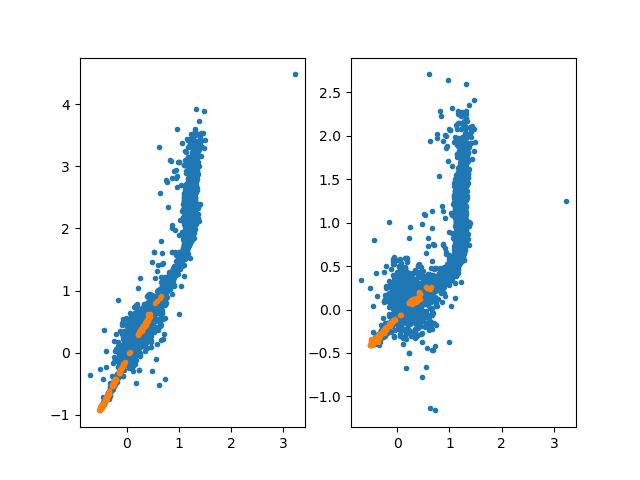

In [46]:
plt.figure()
plt.subplot(121)
plt.plot(gr,gi,'.')
plt.plot(model['g']-model['r'],model['g']-model['i'],'.')

plt.subplot(122)
plt.plot(gr,ri,'.')
plt.plot(model['g']-model['r'],model['r']-model['i'],'.')


In [47]:
dgr = gr[:,np.newaxis] - mgr[np.newaxis,:]
dgi = gi[:,np.newaxis] - mgi[np.newaxis,:]
dist = np.sqrt(dgi**2 + dgr**2)
mindist = np.nanmin(dist,axis=1)
minarg = np.argmin(dist,axis=1)
ind = mindist < 0.01

<IPython.core.display.Javascript object>


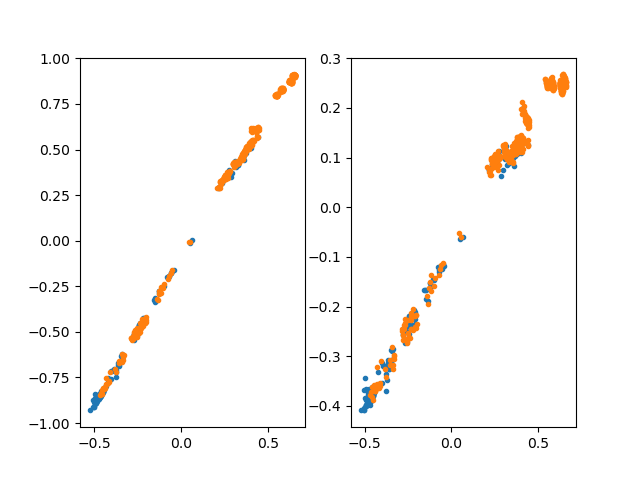

In [48]:
plt.figure()
plt.subplot(121)
plt.plot(model['g']-model['r'],model['g']-model['i'],'.')
plt.plot(gr[ind],gi[ind],'.')

plt.subplot(122)
plt.plot(model['g']-model['r'],model['r']-model['i'],'.')
plt.plot(gr[ind],ri[ind],'.')

In [49]:
model['model'][minarg[ind]]

array(['lb227_004', 'ngc6681_12_stis_001', 'hd55677_mod_002',
       'hd205905_stis_005', 'bd60d1753_stiswfc_002', 'hd2811_mod_002',
       'lb227_004', 'gd153_stiswfcnic_002', 'bd29d2091_stis_005',
       'hd106252_mod_003', 'wd0947_857_mod_001', 'ngc6681_12_stis_001',
       'ngc6681_2_stis_001', 'wd1057_719_mod_006', 'hd106252_mod_003',
       'lb227_004', 'p041c_stisnic_008', 'lb227_004', 'hd165459_mod_003',
       'ngc6681_12_stis_001', 'hd55677_mod_002',
       'sf1615_001a_stisnic_008', 'gd50_004', 'hd142331_stis_002',
       'gd50_004', 'wd1657_343_mod_007', 'wd0947_857_mod_001',
       'hd158485_stis_005', 'bd02d3375_stis_005', 'ngc6681_2_stis_001',
       'ngc6681_4_stis_001', 'lb227_004', 'ngc6681_8_stis_001',
       'sirius_mod_004', 'lb227_004', 'wd1057_719_mod_006',
       'ngc6681_12_stis_001', 'gj7541a_mod_001', 'bd21d0607_mod_002',
       'bd_75d325_stis_005', 'snap1_stisnic_007', 'ngc6681_12_stis_001',
       'bd21d0607_mod_002', 'hd115169_mod_002', 'lb227_004', 'lb22

In [50]:
def model_name(name):
    datapath = '/Users/rridden/Documents/work/data/calspec/'
    model = datapath + name + '.dat'
    return model

def Load_model(model, mag,pb = 'ps1g',Renorm= True):
    model_sed = source_synphot.source.pre_process_source(model,mag,pb,0,Renorm=Renorm)
    return model_sed

In [51]:
g = data['gMeanPSFMag'].values
g = g[ind]
r = data['rMeanPSFMag'].values
r = r[ind]
i = data['iMeanPSFMag'].values
i = i[ind]

k = data['kMeanPSFMag'].values
k = k[ind]

In [52]:
sed = {}
for i in range(len(g)):
    print(i)
    name = model_name(model['model'][minarg[ind]][i])
    try:
        sed['star '+ str(i)] = Load_model(name,np.nan,'ps1r')
    except:
        sed['star '+ str(i)] = np.nan
    

0
1
Warning, 5 of 2771 bins contained negative fluxes; they have been set to zero.
2
3
Warning, 9 of 6261 bins contained negative fluxes; they have been set to zero.
4
Warning, 22 of 6990 bins contained negative fluxes; they have been set to zero.
5
6
7
8
Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
9
10
11
Warning, 5 of 2771 bins contained negative fluxes; they have been set to zero.
12
Warning, 41 of 2777 bins contained negative fluxes; they have been set to zero.
13
14
15
16
17
18
19
Warning, 5 of 2771 bins contained negative fluxes; they have been set to zero.
20
21
Warning, 10 of 4465 bins contained negative fluxes; they have been set to zero.
22
23
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
24
25
26
27
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
28
29
Warning, 41 of 2777 bins contained negative fluxes; they have been set to zero.
30
Warning, 26 of 2771 bins contained negativ

281
282
283
284
Warning, 22 of 6990 bins contained negative fluxes; they have been set to zero.
285
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
286
287
Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
288
289
290
291
292
293
Warning, 5 of 2771 bins contained negative fluxes; they have been set to zero.
294
295
296
297
298
299
Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
318
319
320
321
Warning, 29 of 6262 bins contained negative fluxes; they have been set to zero.
322
Warning, 5 of 3889 bins contained negative fluxes; they have been set to zero.
323
Warning, 10 of 6254 bins contained negative fluxes; they have been set to zero.
324
325
326
Warning, 5 of 2771 bins contained negative fluxes; they have been set to zero.
327
328
329
Warning,

In [204]:
sed

{'star 0': <pysynphot.spectrum.CompositeSourceSpectrum at 0x7fd6a5038a30>,
 'star 1': <pysynphot.spectrum.CompositeSourceSpectrum at 0x7fd835d95160>,
 'star 2': <pysynphot.spectrum.CompositeSourceSpectrum at 0x7fd6a5038e80>,
 'star 3': nan,
 'star 4': <pysynphot.spectrum.CompositeSourceSpectrum at 0x7fd835d95c40>,
 'star 5': <pysynphot.spectrum.CompositeSourceSpectrum at 0x7fd835f7ccd0>,
 'star 6': <pysynphot.spectrum.CompositeSourceSpectrum at 0x7fd6a5038c10>}

<IPython.core.display.Javascript object>


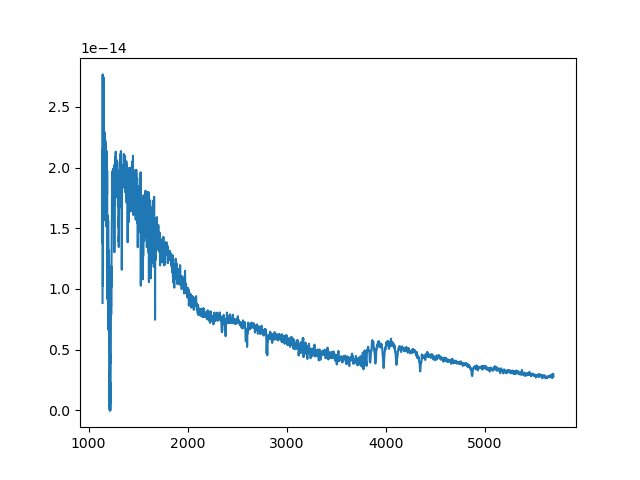

In [106]:
plt.figure()
plt.plot(sed.wave,sed.flux)

In [97]:
passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("Kep")]
pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
magmodel = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, magmodel)
pbnames = pbs.keys()

In [99]:
pbs

OrderedDict([('Kep',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7faf4d44e160>,
               -21.405741755339733)),
             ('ps1g',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7faf3b70fa30>,
               -20.836195000114955)),
             ('ps1r',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7faf4d448550>,
               -21.370261319386927)),
             ('ps1i',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7faf4eaa68e0>,
               -21.793287528964058)),
             ('ps1z',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7faf4e812340>,
               -22.09903034378283)),
             ('ps1y',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7faf4e82aa00>,
               -22.325516493196154))])

In [98]:
test = Spec_mags(sed,pbs)

NameError: name 'sed' is not defined

In [190]:
test['g'] - g

array([-0.02178754,  0.01090816,  0.00207796, -0.02772441, -0.01007556,
       -0.01625685, -0.01729814])

In [191]:
np.nanmedian(test['k'] - k)

25.56900657133488

# Try pickle

In [208]:
path = '../../data/pickle/'
files = glob(path + '*.dat')
files = [x for x in files if (('ukr' not in x) and ('ukw' not in x))]
def Specs(Specs):
    specs = {}
    for spec in Specs:
        model_sed = source_synphot.source.pre_process_source(spec,np.nan,'ps1g',0,Renorm=False)
        specs[spec] = model_sed
    return specs
pickle = Specs(files)

Warning, 36 of 4771 bins contained negative fluxes; they have been set to zero.
Warning, 42 of 4771 bins contained negative fluxes; they have been set to zero.


In [211]:
p  = Spec_mags(pickle,pbs)

In [220]:
gr = data['gMeanPSFMag'] - data['rMeanPSFMag']
gi = data['gMeanPSFMag'] - data['iMeanPSFMag']
ri = data['rMeanPSFMag'] - data['iMeanPSFMag']

mgi = p['g']-p['i']
ind = mgi < 1.5
mgi = mgi[ind]

mgr = p['g']-p['r']
mgr = mgr[ind]


mri = p['r']-p['i']
mri = mri[ind]


<IPython.core.display.Javascript object>


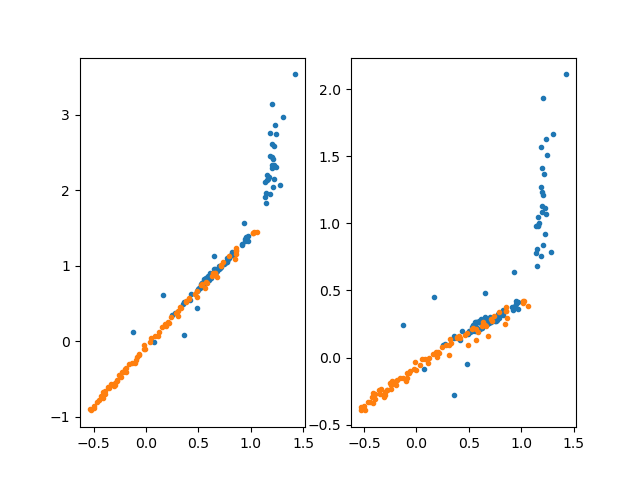

In [221]:
plt.figure()
plt.subplot(121)
plt.plot(gr,gi,'.')
plt.plot(mgr,mgi,'.')

plt.subplot(122)
plt.plot(gr,ri,'.')
plt.plot(mgr,mri,'.')


In [256]:
dgr = gr[:,np.newaxis] - mgr[np.newaxis,:]
dgi = gi[:,np.newaxis] - mgi[np.newaxis,:]
dist = np.sqrt(dgi**2 + dgr**2)
mindist = np.nanmin(dist,axis=1)
minarg = np.argmin(dist,axis=1)
ind = mindist < 0.1

g = data['gMeanPSFMag'].values
g = g[ind]
r = data['rMeanPSFMag'].values
r = r[ind]
i = data['iMeanPSFMag'].values
i = i[ind]

k = data['kMeanPSFMag'].values
k = k[ind]

<IPython.core.display.Javascript object>


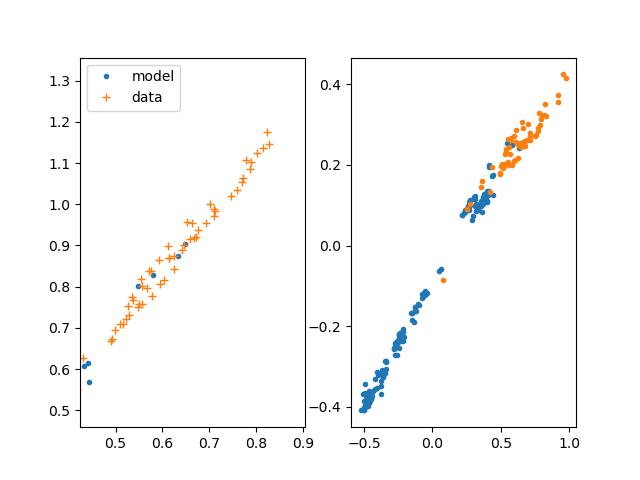

In [257]:
plt.figure()
plt.subplot(121)
plt.plot(model['g']-model['r'],model['g']-model['i'],'.',label = 'model')
plt.plot(gr[ind],gi[ind],'+',label='data')
plt.legend()

plt.subplot(122)
plt.plot(model['g']-model['r'],model['r']-model['i'],'.')
plt.plot(gr[ind],ri[ind],'.')

In [251]:
sed = {}
goodind = []
for i in range(len(g)):
    print(i)
    name = model_name(model['model'][minarg[ind]][i])
    try:
        sed['star '+ str(i)] = Load_model(name,g[i],'ps1g')
        goodind += [i]
    except:
        pass
        

    

0
1
2
3
4
5
6


In [263]:
sed

In [253]:
ptest = Spec_mags(sed,pbs)

In [259]:
ptest['g'] - g[goodind]

array([ 1.06568368,  0.02980524,  0.28988393,  1.95747203, -0.63312942,
       -0.27878567])

In [254]:
ptest['r'] - r[goodind]

array([0.69866544, 0.77039182, 0.70186597, 0.02726283, 1.11454236,
       0.90654381])

In [255]:
np.nanmedian(ptest['k'] - k[goodind])

26.011842845325035

# try SDSS

In [83]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

In [84]:
test = data#.iloc[ind]

In [85]:
cord = coords.SkyCoord(test.RAJ2000.values,test.DecJ2000.values, frame="icrs", unit="deg")

In [86]:
cord

<SkyCoord (ICRS): (ra, dec) in deg
    [(137.22024 , 11.504619), (137.536498, 11.509884),
     (137.004418, 11.54474 ), ..., (130.938176, 25.469551),
     (130.544892, 25.483373), (129.538618, 25.492313)]>

In [8]:
xid = []
spec_ind = []
for i in range(len(cord)):
    thing = SDSS.query_region(cord[i], spectro=True)
    if thing is not None:
        xid += [thing]
        spec_ind += [i]

In [12]:
sp = SDSS.get_spectra(matches=xid[1])
a = sp[0][1]
spec = a.data
wave = 10**spec['loglam']
flux = spec['flux'] * 1e-17

HTTPError: HTTP Error 404: Not Found

In [ ]:
plt.figure()
for i in range(len(xid)):
    sp = SDSS.get_spectra(matches=xid[i])
    a = sp[0][1]
    data = a.data
    wave = 10**data['loglam']
    flux = data['flux'] * 1e-17
    plt.plot(wave,flux)

In [310]:
len(xid)

4

In [87]:
from astropy.table import Table

In [40]:
test = S.ArraySpectrum(wave=10**spec['loglam'],flux=spec['flux'] * 1e-17,fluxunits='flam')

Warning, 2 of 3818 bins contained negative fluxes; they have been set to zero.


In [27]:
passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("Kep")]
pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
model = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, model)
pbnames = pbs.keys()

OrderedDict([('Kep',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7fe99c1a9f40>,
               -21.405741755339733)),
             ('ps1g',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7fe99c5fae80>,
               -20.836195000114955)),
             ('ps1r',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7fe958998940>,
               -21.370261319386927)),
             ('ps1i',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7fe958b113d0>,
               -21.793287528964058)),
             ('ps1z',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7fe99c1d1940>,
               -22.09903034378283)),
             ('ps1y',
              (<pysynphot.spectrum.ArraySpectralElement at 0x7fe958b11130>,
               -22.325516493196154))])

<IPython.core.display.Javascript object>


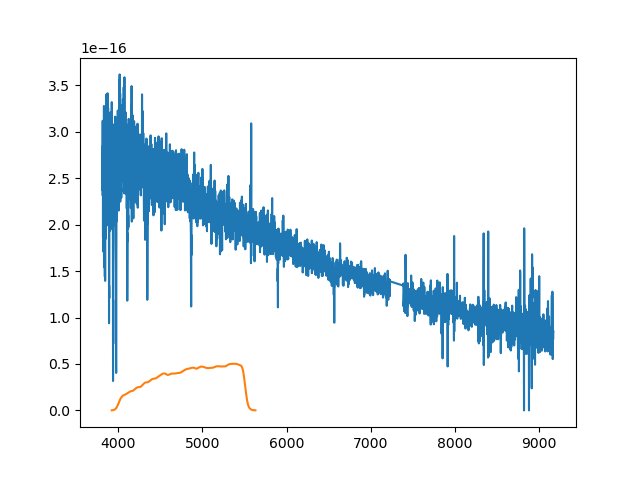

<IPython.core.display.Javascript object>


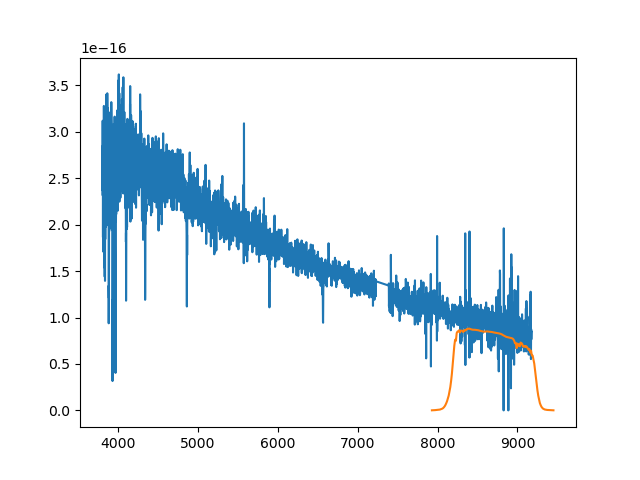

In [67]:
pb = pbs['ps1z']
plt.figure()
plt.plot(test.wave,test.flux)
plt.plot(pb[0].wave,pb[0].throughput*1e-16)

In [88]:
ob_mag = data.zMeanPSFMag.iloc[spec_ind[1]]

NameError: name 'spec_ind' is not defined

In [89]:
syn_mag = source_synphot.passband.synphot(test,pb[0],zp=pb[1])

NameError: name 'pb' is not defined

In [70]:
syn_mag - ob_mag

0.12534066940649424

In [90]:
from urllib.error import HTTPError

def SDSS_spec(coordinate):
    xid = SDSS.query_region(coordinate, spectro=True)
    mags = {}
    if xid is not None:
        try:
            sp = SDSS.get_spectra(matches=xid)
            a = sp[0][1]
            spec = a.data
            wave = 10**spec['loglam']
            flux = spec['flux'] * 1e-17
            sdss_spec = S.ArraySpectrum(wave=10**spec['loglam'],
                                   flux=spec['flux'] * 1e-17,fluxunits='flam')
        except HTTPError:
            print("spec doesn't actaully exist")
            sdss_spec = None
    else:
        sdss_spec = None

    return sdss_spec

In [91]:
xid = SDSS.query_region(cord, spectro=True)
print(xid)


sp = SDSS.get_spectra(matches=xid)
a = sp[0][1]
data = a.data
wave = 10**d2['loglam']
flux = d2['flux'] * 1e-17

ConnectionError: ('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))

In [92]:
def Syn_mag(pbs,spec):
    mag = {}
    for pb in pbs:
        if spec is not None:
            syn_mag = source_synphot.passband.synphot(spec,pbs[pb][0],zp=pbs[pb][1])
        else:
            syn_mag = np.nan
        mag[pb] = syn_mag
        
    return mag
    

In [93]:
from copy import deepcopy

In [94]:
xid = []
spec_ind = []
for i in range(len(cord)):
    thing = SDSS.query_region(cord[i], spectro=True)
    if thing is not None:
        xid += [thing]
        spec_ind += [i]

In [100]:
d = deepcopy(data)
cord = coords.SkyCoord(d.RAJ2000.values,d.DecJ2000.values, frame="icrs", unit="deg")
for pb in pbs:
    d[pb + '_synSDSS'] = np.nan
        
for i in range(len(cord)):
    spec = SDSS_spec(cord[i])
    if spec is not None:
        spec = spec.renorm(d['gMeanPSFMag'].iloc[i],'abmag',pbs['ps1g'][0])
        spec.convert('flam')
    mag = Syn_mag(pbs,spec)
    for pb in pbs:
        d[pb + '_synSDSS'].iloc[i] = mag[pb]

Warning, 9 of 3829 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
Warning, 4 of 3839 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
spec doesn't actaully exist
Warning, 1 of 3825 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 3812 bins contained negative fluxes; they have been set to zero.
Warning, 51 of 3818 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
Warning, 3 of 3834 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
spec doesn't actaully exist
Warning, 54 of 3836 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
Warning, 9 of 3836 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 3835 bins contained negative fluxes; they have been set to zero.
Warning, 609 of 3832 bins contained negative fluxes; they have been set to zero.
Warning, 4

spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
Warning, 6 of 3826 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
Warning, 182 of 3837 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
Warning, 15 of 3829 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
spec doesn't actaully exist
Warning, 1 of 3834 bins contained negative fluxes; they have been set to zero.
Warning, 15 of 3833 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 3834 bins contained negative fluxes; they have been set to zero.
Warning, 31 of 3827 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 3834 bins contained negative fluxes; they have been set to zero.

spec doesn't actaully exist
spec doesn't actaully exist
Warning, 1 of 3832 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
Warning, 3 of 3826 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 3829 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
Warning, 3 of 3825 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
Warning, 33 of 3827 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
Warning, 5 of 3808 bins contained negative fluxes; they have been set to zero.
spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
spec doesn't actaully exist
Warning, 3 of 3834 bins contained negative fluxes; they have been set to zero.
Warning, 74 of 3817 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 3828 bins contained negative fluxes; they ha

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


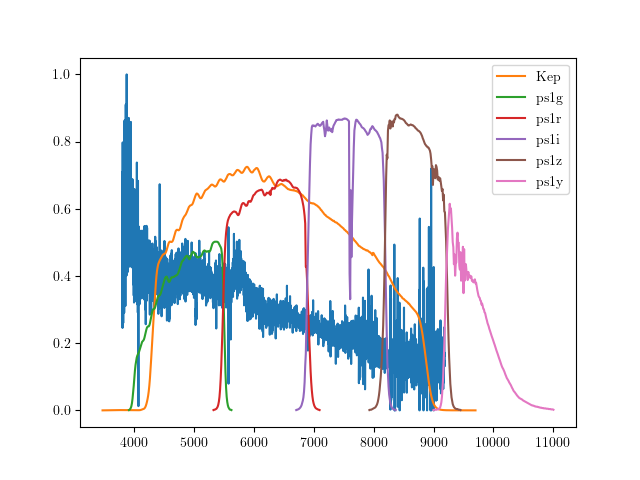

In [175]:
plt.figure()
plt.plot(spec.wave,spec.flux/np.nanmax(spec.flux))
for key in pbs:
    plt.plot(pbs[key][0].wave,pbs[key][0].throughput,label=key)
plt.legend()

In [32]:
zps = np.load('output/zeropoint_kep.npy')

In [377]:
cut = deepcopy(d)
ind = ((d.gMeanPSFMag.values - d.rMeanPSFMag.values) > 0.2) & ((d.gMeanPSFMag.values - d.rMeanPSFMag.values) < 0.8)
cut = cut.iloc[ind]

ind = (cut.rMeanPSFMag.values <= 18) & (cut.rMeanPSFMag.values >= 14) & (np.isfinite(cut.ps1r_synSDSS.values)) 
cut = cut.iloc[ind]

channel_inds = cut['Channel'].values
eh = zps[16][channel_inds-1]


diff = -(cut.Kep_synSDSS.values - cut.kMeanPSFMag.values - eh)

from astropy.stats import sigma_clip
r = -(cut.ps1r_synSDSS.values - cut.rMeanPSFMag.values)
g = -(cut.ps1g_synSDSS.values - cut.gMeanPSFMag.values)
ib = -(cut.ps1i_synSDSS.values - cut.iMeanPSFMag.values)
ind =  (~sigma_clip(diff,sigma=3,masked=True).mask) &(~sigma_clip(g,sigma=3,masked=True).mask) & (~sigma_clip(g,sigma=3,masked=True).mask)& (~sigma_clip(i,sigma=3,masked=True).mask)

In [325]:
diff.shape

(135,)

In [354]:
ind = ((~sigma_clip(diff,sigma=3,masked=True).mask) &  
        (~sigma_clip(r,sigma=3,masked=True).mask) &
      (~sigma_clip(g,sigma=3,masked=True).mask)) 
ind =  (~sigma_clip(diff,sigma=3,masked=True).mask) &(~sigma_clip(g,sigma=3,masked=True).mask) & (~sigma_clip(g,sigma=3,masked=True).mask)& (~sigma_clip(i,sigma=3,masked=True).mask)
#ind = (abs(g) <= .1) & (~sigma_clip(diff,sigma=3,masked=True).mask)

<IPython.core.display.Javascript object>


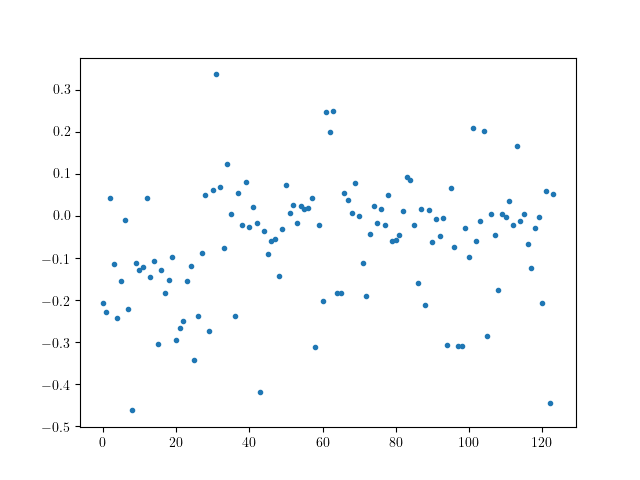

In [349]:
x = np.arange(0,len(diff))
plt.figure()
plt.plot(diff[ind],'.')
#plt.plot(x[~ind],diff[~ind],'.')

<IPython.core.display.Javascript object>


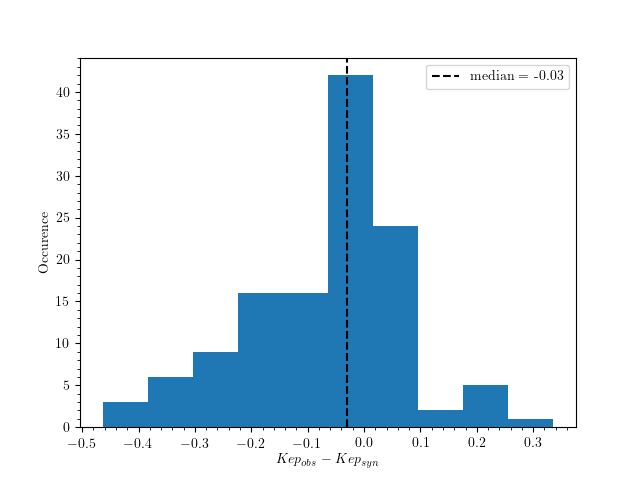

In [350]:

plt.figure()
plt.hist(diff[ind])
plt.ylabel('Occurence')
plt.xlabel('$Kep_{obs}-Kep_{syn}$')
med = np.nanmedian(diff[ind])
plt.axvline(med,ls='--',color='k',
            label='median = '+ str(np.round(med,3)))
plt.minorticks_on()
#plt.xlim(24,27)
plt.legend()
#plt.savefig('c16_sdss_everest_kzp.pdf')

<IPython.core.display.Javascript object>


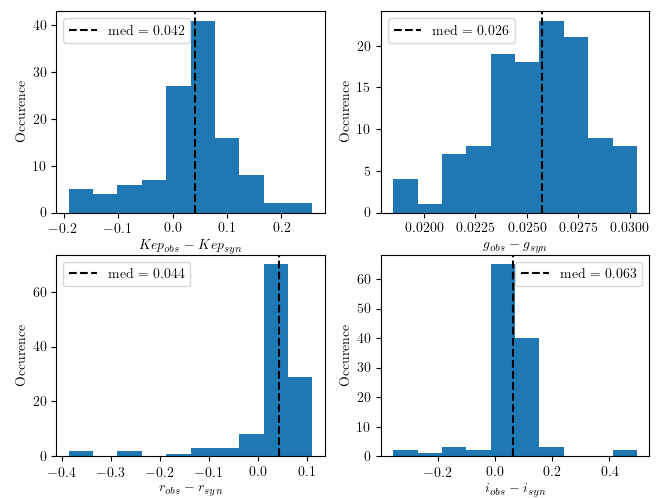

In [378]:
fig = plt.figure(figsize=(2*fig_width,2*fig_width))
plt.subplot(2,2,1)

plt.hist(diff[ind])
plt.ylabel('Occurence')
plt.xlabel('$Kep_{obs}-Kep_{syn}$')
med = np.nanmedian(diff[ind])
plt.axvline(med,ls='--',color='k',
            label='med = '+ str(np.round(med,3)))
#plt.minorticks_on()
#plt.xlim(24,27)
plt.legend()

plt.subplot(2,2,2)
plt.hist(g[ind])
plt.xlabel('$g_{obs} - g_{syn}$')
plt.ylabel('Occurence')
#plt.minorticks_on()

med = np.nanmedian(g[ind])
plt.axvline(med,ls='--',color='k',
            label='med = '+ str(np.round(med,3)))
plt.legend()
#plt.xlim(-.5,.5)

plt.subplot(2,2,3)
plt.hist(r[ind])
plt.xlabel('$r_{obs} - r_{syn}$')
plt.ylabel('Occurence')
#plt.minorticks_on()
med = np.nanmedian(r[ind])
plt.axvline(med,ls='--',color='k',
            label='med = '+ str(np.round(med,3)))
plt.legend()
#plt.xlim(-.5,.5)

plt.subplot(2,2,4)
plt.hist(ib[ind])
plt.xlabel('$i_{obs} - i_{syn}$')
plt.ylabel('Occurence')
#plt.minorticks_on()
med = np.nanmedian(ib[ind])
plt.axvline(med,ls='--',color='k',
            label='med = '+ str(np.round(med,3)))

plt.legend()
#plt.xlim(-.5,.5)



#plt.subplot(2,2,4)
#cut.ps1z_synSDSS.iloc[np.isinf(cut.ps1z_synSDSS.values)] = np.nan
#dd = cut.ps1z_synSDSS.values - cut.zMeanPSFMag.values
#plt.hist(-dd[ind])
#plt.xlabel('$z_{obs} - z_{syn}$')
#plt.ylabel('Occurence')
#plt.minorticks_on()
#plt.xlim(-.5,.5)

plt.tight_layout()
fig.set_size_inches(fig_width*2,fig_width*1.5)
plt.savefig('c16_sdss_everest_error2.pdf')

<IPython.core.display.Javascript object>


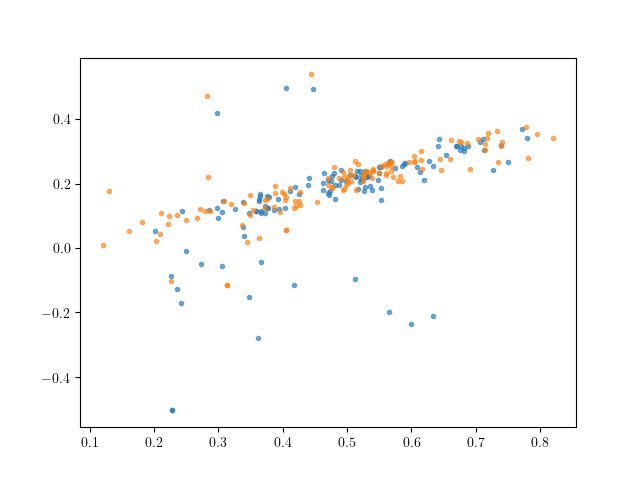

In [287]:
plt.figure()
plt.plot(cut.gMeanPSFMag[ind]-cut.rMeanPSFMag[ind],cut.rMeanPSFMag[ind] - cut.iMeanPSFMag[ind],'.',alpha=0.6)
plt.plot(cut.ps1g_synSDSS[ind]-cut.ps1r_synSDSS[ind],cut.ps1r_synSDSS[ind] - cut.ps1i_synSDSS[ind],'.',alpha=0.6)

In [36]:
(np.isnan(cut.ps1i_synSDSS.values))

array([ True, False,  True, ...,  True,  True,  True])

In [174]:
type(spec) == S.spectrum.ArraySourceSpectrum

True

In [6]:
data.keys()

Index(['ID', 'campaign', 'Kpmag', 'RAJ2000', 'DecJ2000', 'objID', 'ps_score',
       'raMean', 'decMean', 'raMeanErr', 'decMeanErr', 'qualityFlag',
       'gMeanPSFMag', 'gMeanPSFMagErr', 'gMeanPSFMagNpt', 'rMeanPSFMag',
       'rMeanPSFMagErr', 'rMeanPSFMagNpt', 'iMeanPSFMag', 'iMeanPSFMagErr',
       'iMeanPSFMagNpt', 'zMeanPSFMag', 'zMeanPSFMagErr', 'zMeanPSFMagNpt',
       'yMeanPSFMag', 'yMeanPSFMagErr', 'yMeanPSFMagNpt', 'rMeanKronMag',
       'rMeanKronMagErr', 'nDetections', 'ng', 'nr', 'ni', 'nz', 'ny',
       'gFlags', 'gQfPerfect', 'rFlags', 'rQfPerfect', 'iFlags', 'iQfPerfect',
       'zFlags', 'zQfPerfect', 'yFlags', 'yQfPerfect', 'primaryDetection',
       'bestDetection', 'Module', 'Channel', 'Output', 'PDC', 'PDCe', 'SAP',
       'SAPe', 'kMeanPSFMag', 'kMeanPSFMagErr'],
      dtype='object')

In [28]:
g = 10**(-2/5 *(data['gMeanPSFMag'].values-25))
r = 10**(-2/5 *(data['rMeanPSFMag'].values-25))
i = 10**(-2/5 *(data['iMeanPSFMag'].values-25))
z = 10**(-2/5 *(data['zMeanPSFMag'].values-25))

k = data['kMeanPSFMag'].values

kcom = 0.37528924*g + 0.37592223*r + 0.19063787*i + 0.0586959*z - 0.08385487*(g-r)
kcom = -2.5*np.log10(kcom) + 25

In [29]:
g

array([-10.8953734 ,  -7.73842516, -10.1372905 , ..., -11.1437699 ,
        -9.80472366, -10.98837378])

In [30]:


#k = -2.5*np.log10(k)

In [31]:
kcom - k

array([25.21378352, 26.84855133, 25.20869886, ..., 25.2282303 ,
       25.23401592, 25.20335681])

In [34]:
channel_inds = data['Channel'].values
eh = zps[16][channel_inds-1]

In [35]:
eh

array([25.27519081, 25.27519081, 25.27519081, ..., 25.23680794,
       25.23981659, 25.23981659])

In [39]:
np.nanmedian(kcom - k - eh)

0.014771427053041464

In [40]:
np.nanstd(kcom - k - eh)

0.5086528787191811

<IPython.core.display.Javascript object>


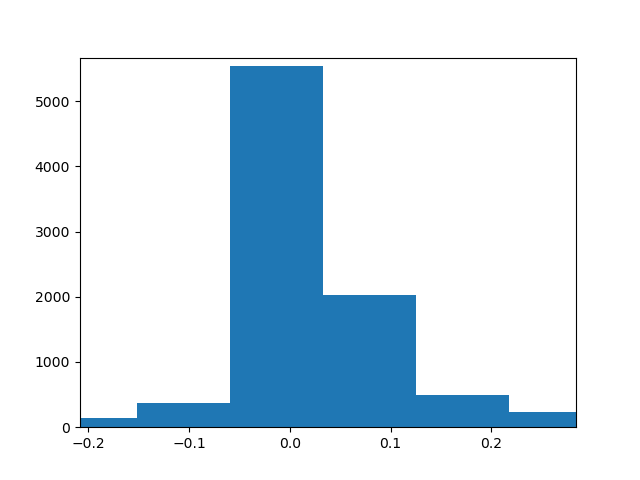

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 5.000e+00, 1.000e+01, 1.500e+01, 2.200e+01, 2.000e+01,
        4.100e+01, 4.800e+01, 7.500e+01, 1.340e+02, 3.640e+02, 5.537e+03,
        2.024e+03, 4.980e+02, 2.370e+02, 1.640e+02, 1.310e+02, 9.000e+01,
        6.800e+01, 6.600e+01, 3.200e+01, 3.200e+01, 4.400e+01, 3.200e+01,
        3.000e+01, 2.400e+01, 2.400e+01, 2.700e+01, 1.800e+01, 1.500e+01,
        1.600e+01, 8.000e+00, 1.300e+01, 1.200e+01, 4.000e+00, 5.000e+00,
        8.000e+00, 6.000e+00, 1.200e+01, 9.000e+00, 5.000e+00, 7.000e+00,
        4.000e+00, 5.000e+00, 5.000e+00, 1.000e+01, 3.000e+00, 5.000e+00,
        4.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+0

In [38]:
plt.figure()
plt.hist(kcom - k - eh,bins=100)

<IPython.core.display.Javascript object>


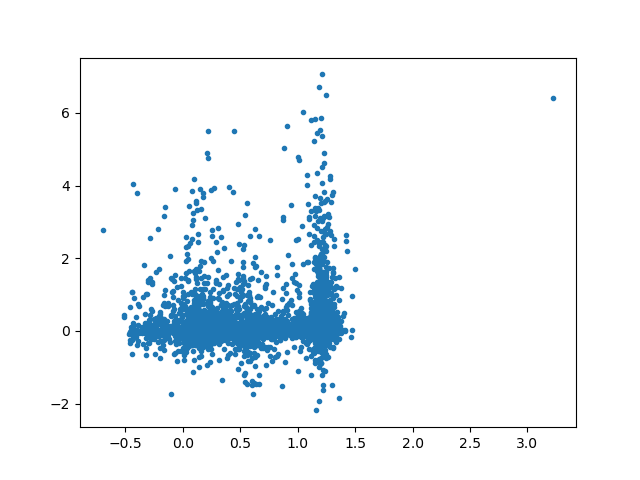

In [43]:
plt.figure()
plt.plot(data['gMeanPSFMag'].values-data['rMeanPSFMag'].values,kcom - k - eh,'.')

In [45]:
diff = kcom - k - eh

In [56]:
gr = data['gMeanPSFMag'].values-data['rMeanPSFMag'].values
cind = (0.25 < gr) & (gr < 0.8)

In [57]:
diff = diff[cind]
ind = ~sigma_clip(diff).mask
ind[ind] = ~sigma_clip(diff[ind]).mask

<IPython.core.display.Javascript object>


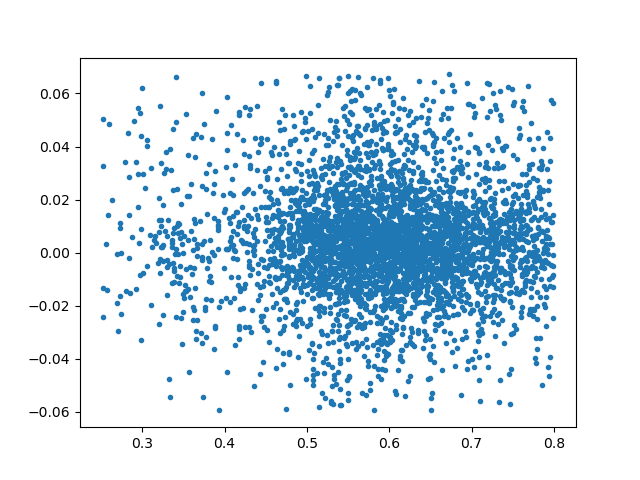

In [58]:
plt.figure()
plt.plot(gr[cind][ind],diff[ind],'.')

<IPython.core.display.Javascript object>


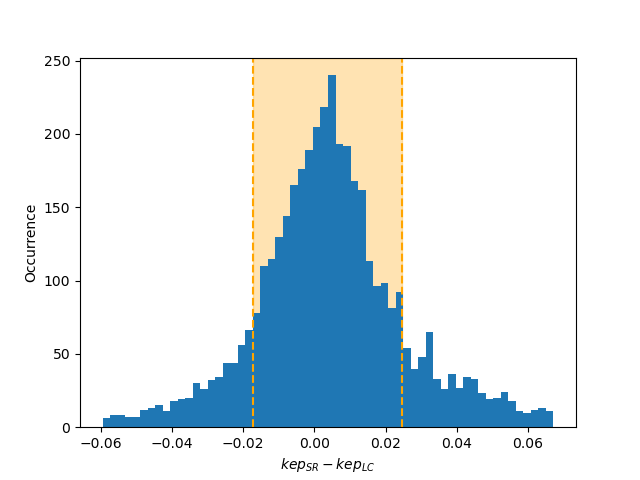

Text(0.5, 0, '$kep_{SR} - kep_{LC}$')

In [82]:
median = np.nanmedian(diff[ind])
std = np.nanstd(diff[ind])
plt.figure()
plt.axvspan(median-std,median+std,color='orange',alpha=0.3)
plt.hist(diff[ind],bins=60)
plt.axvline(median-std,ls='--',color='orange')
plt.axvline(median+std,ls='--',color='orange')
plt.ylabel('Occurrence')
plt.xlabel(r'$kep_{SR} - kep_{LC}$')


In [81]:
median

0.0037457149943627144

In [60]:
np.nanstd(diff[ind])

0.02088661371984067